In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ------------------------------

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Load dataset
data = pd.read_csv('ds/Bank Customer Churn Prediction.csv')

In [3]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
df = data[:][['balance', 'products_number', 'credit_score', 'credit_card', 'active_member', 'churn']]

In [5]:
df

,balance,products_number,credit_score,credit_card,active_member,churn
0,0.00,1,619,1,1,1
1,83807.86,1,608,0,1,0
2,159660.80,3,502,1,0,1
3,0.00,2,699,0,0,0
4,125510.82,1,850,1,1,0
...,...,...,...,...,...,...
9995,0.00,2,771,1,0,0
9996,57369.61,1,516,1,1,0
9997,0.00,1,709,0,1,1
9998,75075.31,2,772,1,0,1


In [6]:
df['churn'].value_counts()[0], df['churn'].value_counts()[1]

(7963, 2037)

In [7]:
# Preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Save the array to a file
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [10]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=np.ravel(y_train))

In [11]:
class_weights

array([0.62794349, 2.45398773])

In [12]:
# Building ANN model
classifier_ann = Sequential()
classifier_ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=5))
classifier_ann.add(Dropout(rate=0.1))
classifier_ann.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
classifier_ann.add(Dropout(rate=0.1))
classifier_ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Building other models
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0, class_weight='balanced')
classifier_svm = SVC(C = 2.8, kernel='sigmoid', random_state=0, probability=True, class_weight='balanced')

### Fitting the models

In [14]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [15]:
classifier_svm.fit(X_train, y_train)

SVC(C=2.8, class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=0)

In [16]:
classifier_ann.fit(X_train, y_train, batch_size= 16, validation_split=(0.1), epochs=100)

Epoch 1/100
450/450 [==============================] - 4s 5ms/step - loss: 0.5460 - accuracy: 0.7944 - val_loss: 0.4665 - val_accuracy: 0.8100
Epoch 2/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4912 - accuracy: 0.7947 - val_loss: 0.4595 - val_accuracy: 0.8100
Epoch 3/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.7947 - val_loss: 0.4485 - val_accuracy: 0.8100
Epoch 4/100
450/450 [==============================] - 2s 4ms/step - loss: 0.4766 - accuracy: 0.7947 - val_loss: 0.4406 - val_accuracy: 0.8100
Epoch 5/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.7949 - val_loss: 0.4351 - val_accuracy: 0.8100
Epoch 6/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7943 - val_loss: 0.4305 - val_accuracy: 0.8100
Epoch 7/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.7939 - val_loss: 0.4307 - val_accuracy: 0.8100

Epoch 58/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.8164 - val_loss: 0.3807 - val_accuracy: 0.8325
Epoch 59/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.8138 - val_loss: 0.3831 - val_accuracy: 0.8325
Epoch 60/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8143 - val_loss: 0.3805 - val_accuracy: 0.8313
Epoch 61/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.8167 - val_loss: 0.3814 - val_accuracy: 0.8313
Epoch 62/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8158 - val_loss: 0.3821 - val_accuracy: 0.8313
Epoch 63/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.8158 - val_loss: 0.3810 - val_accuracy: 0.8300
Epoch 64/100
450/450 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.8168 - val_loss: 0.3807 - val_accuracy:

In [17]:
# Combining the models
y_pred_rf = classifier_rf.predict_proba(X_test)[:, 1]
y_pred_svm = classifier_svm.predict_proba(X_test)[:, 1]
y_pred_ann = classifier_ann.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [18]:
# create an empty dataframe with sub-columns
results = pd.DataFrame(columns=['RF', 'SVM', 'ANN', 'RF-SDNN', 'SVC-SDNN'],
                        index=['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc'])

In [19]:
results

,RF,SVM,ANN,RF-SDNN,SVC-SDNN
accuracy,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN,NaN
auc_roc,NaN,NaN,NaN,NaN,NaN


In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(confusion, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_filename=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(confusion)

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Save the plot if a filename is provided
    if save_filename:
        plt.savefig(save_filename)

# Define class labels (replace with your actual class labels)
class_names = ['Non-Churn', 'Churn']

#### RF

In [21]:
# set new values for the 'RF' column
y_pred_rf_ = np.where(y_pred_rf > 0.5, 1, 0)
np.save('y_pred_rf_.npy', y_pred_rf_)
results['RF'] = [accuracy_score(y_test, y_pred_rf_),
                 precision_score(y_test, y_pred_rf_, average='weighted'),
                 recall_score(y_test, y_pred_rf_, average='weighted'),
                 f1_score(y_test, y_pred_rf_, average='weighted'),
                 roc_auc_score(y_test, y_pred_rf_, average='weighted')]

In [22]:
print(classification_report(y_test, y_pred_rf_))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1593
           1       0.46      0.32      0.38       407

    accuracy                           0.79      2000
   macro avg       0.65      0.61      0.63      2000
weighted avg       0.76      0.79      0.77      2000



In [23]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_)

Normalized confusion matrix
[[0.9039548  0.0960452 ]
 [0.67567568 0.32432432]]


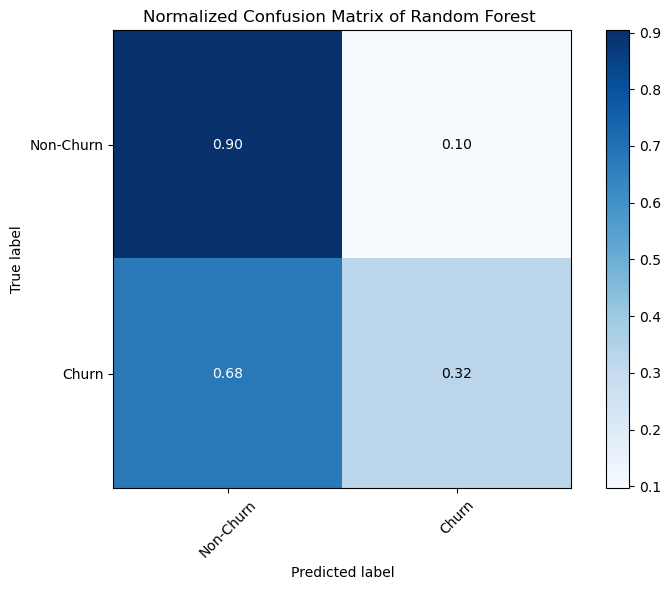

In [24]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf, classes=class_names, normalize=True, title='Normalized Confusion Matrix of Random Forest ', save_filename='norm_cm_random_forest.png')
plt.show()

Confusion matrix, without normalization
[[1440  153]
 [ 275  132]]


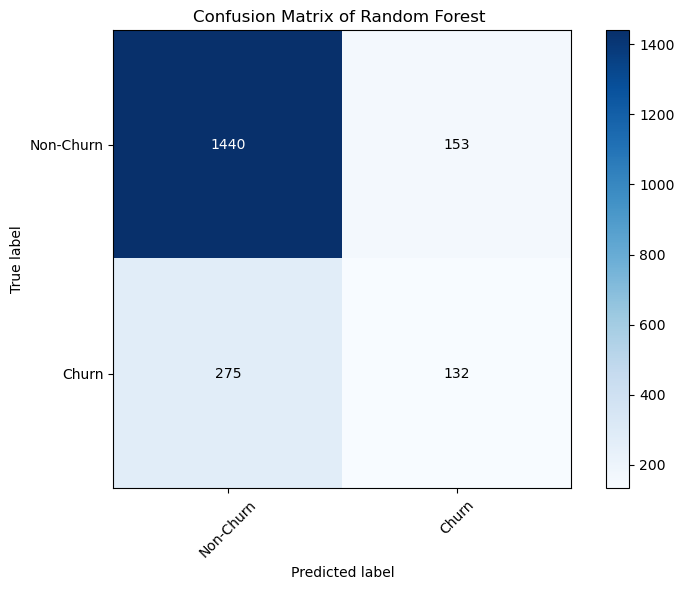

In [25]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf, classes=class_names, normalize=False, title='Confusion Matrix of Random Forest ', save_filename='cm_random_forest.png')
plt.show()

#### SVM

In [26]:
# set new values for the 'SVM' column
y_pred_svm_ = np.where(y_pred_svm > 0.5, 1, 0)
np.save('y_pred_svm_.npy', y_pred_svm_)
results['SVM'] = [accuracy_score(y_test, y_pred_svm_),
                 precision_score(y_test, y_pred_svm_, average='weighted'),
                 recall_score(y_test, y_pred_svm_, average='weighted'),
                 f1_score(y_test, y_pred_svm_, average='weighted'),
                 roc_auc_score(y_test, y_pred_svm_, average='weighted')]

In [27]:
print(classification_report(y_test, y_pred_svm_))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1593
           1       0.87      0.11      0.20       407

    accuracy                           0.82      2000
   macro avg       0.84      0.55      0.55      2000
weighted avg       0.82      0.82      0.75      2000



In [28]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_)

Normalized confusion matrix
[[0.99560578 0.00439422]
 [0.88943489 0.11056511]]


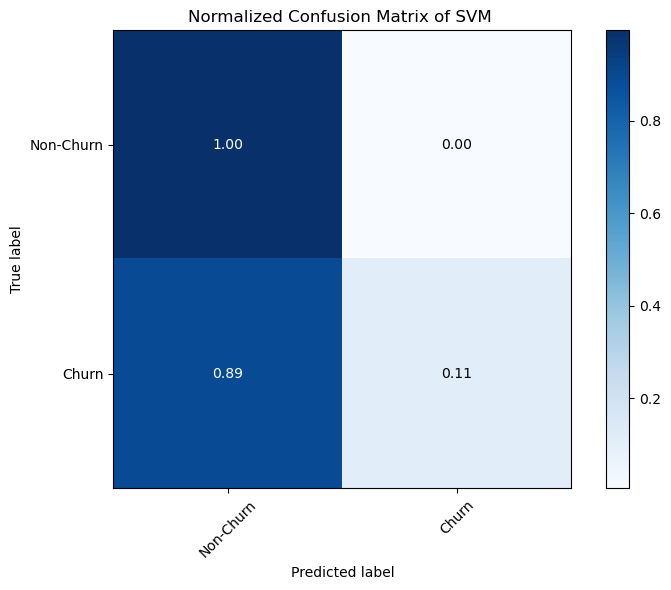

In [29]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svm, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SVM ', save_filename='norm_cm_svm.png')
plt.show()

Confusion matrix, without normalization
[[1586    7]
 [ 362   45]]


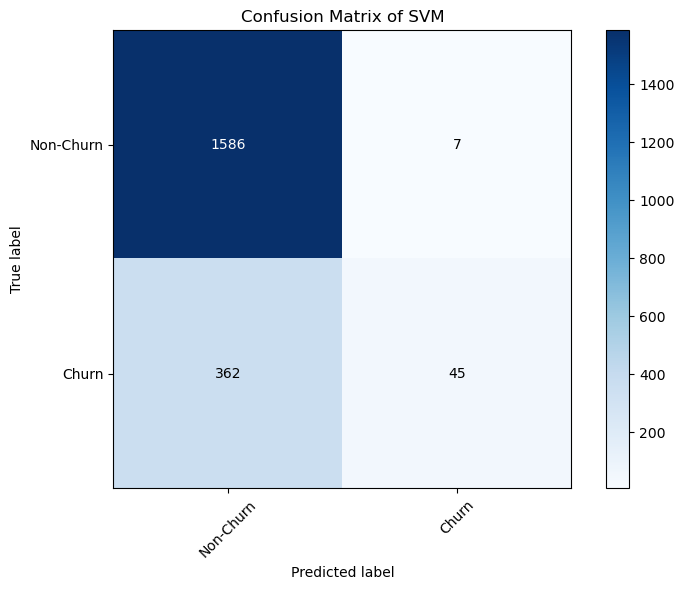

In [30]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svm, classes=class_names, normalize=False, title='Confusion Matrix of SVM', save_filename='cm_svm.png')
plt.show()

#### ANN

In [31]:
# set new values for the 'ANN' column
y_pred_ann_ = np.where(y_pred_ann > 0.5, 1, 0)
np.save('y_pred_ann_.npy', y_pred_ann_)
results['ANN'] = [accuracy_score(y_test, y_pred_ann_),
                 precision_score(y_test, y_pred_ann_, average='weighted'),
                 recall_score(y_test, y_pred_ann_, average='weighted'),
                 f1_score(y_test, y_pred_ann_, average='weighted'),
                 roc_auc_score(y_test, y_pred_ann_, average='weighted')]

In [32]:
print(classification_report(y_test, y_pred_ann_))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.87      0.14      0.23       407

    accuracy                           0.82      2000
   macro avg       0.85      0.57      0.57      2000
weighted avg       0.83      0.82      0.76      2000



In [33]:
# Calculate the confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann_)

Normalized confusion matrix
[[0.99497803 0.00502197]
 [0.86486486 0.13513514]]


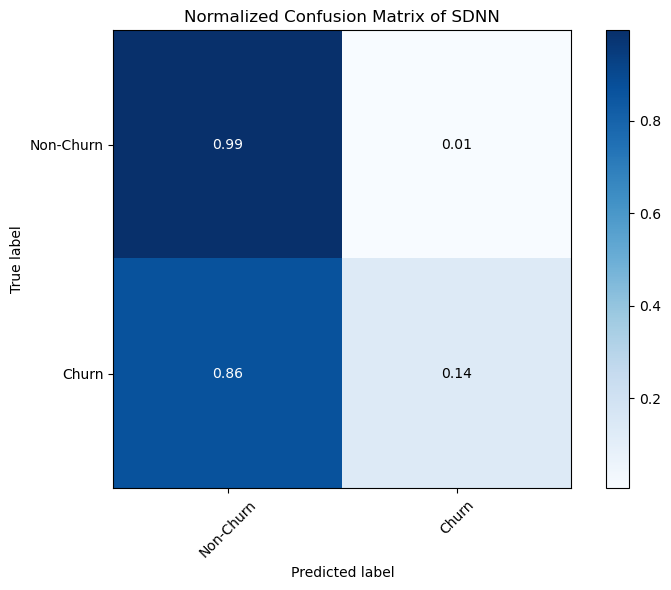

In [34]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_ann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SDNN', save_filename='norm_cm_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1585    8]
 [ 352   55]]


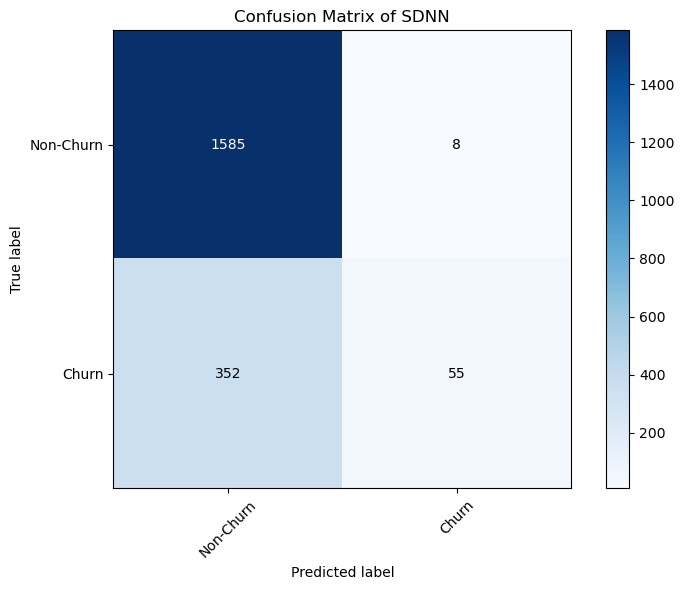

In [35]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_ann, classes=class_names, normalize=False, title='Confusion Matrix of SDNN', save_filename='cm_sdnn.png')
plt.show()

#### RF-SDNN

In [36]:
y_pred_rfann = (y_pred_rf + y_pred_ann.flatten()) / 2
# set new values for the 'RFANN' column
y_pred_rfann_ = np.where(y_pred_rfann > 0.5, 1, 0)
np.save('y_pred_rfann_.npy', y_pred_rfann_)
results['RF-SDNN'] = [accuracy_score(y_test, y_pred_rfann_),
                    precision_score(y_test, y_pred_rfann_, average='weighted'),
                    recall_score(y_test, y_pred_rfann_, average='weighted'),
                    f1_score(y_test, y_pred_rfann_, average='weighted'),
                    roc_auc_score(y_test, y_pred_rfann_, average='weighted')]

In [37]:
print(classification_report(y_test, y_pred_rfann_))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1593
           1       0.62      0.27      0.38       407

    accuracy                           0.82      2000
   macro avg       0.73      0.61      0.63      2000
weighted avg       0.79      0.82      0.79      2000



In [38]:
# Calculate the confusion matrix
cm_rf_ann = confusion_matrix(y_test, y_pred_rfann_)

Normalized confusion matrix
[[0.95731325 0.04268675]
 [0.72972973 0.27027027]]


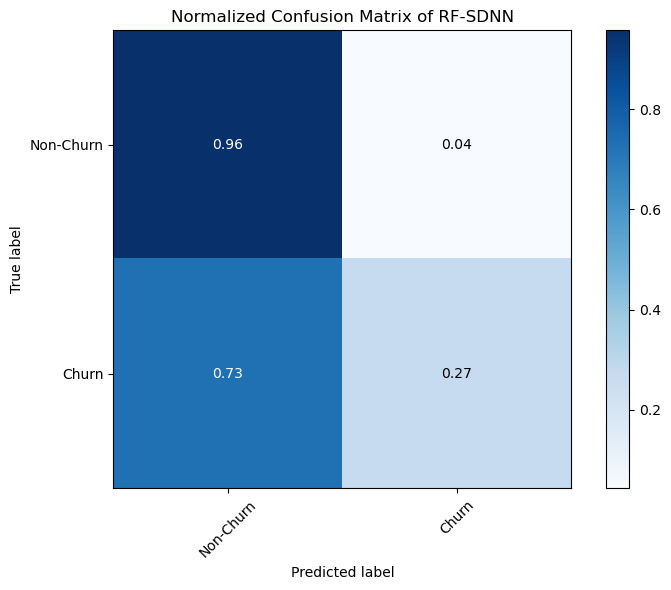

In [39]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf_ann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of RF-SDNN', save_filename='norm_cm_rf_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1525   68]
 [ 297  110]]


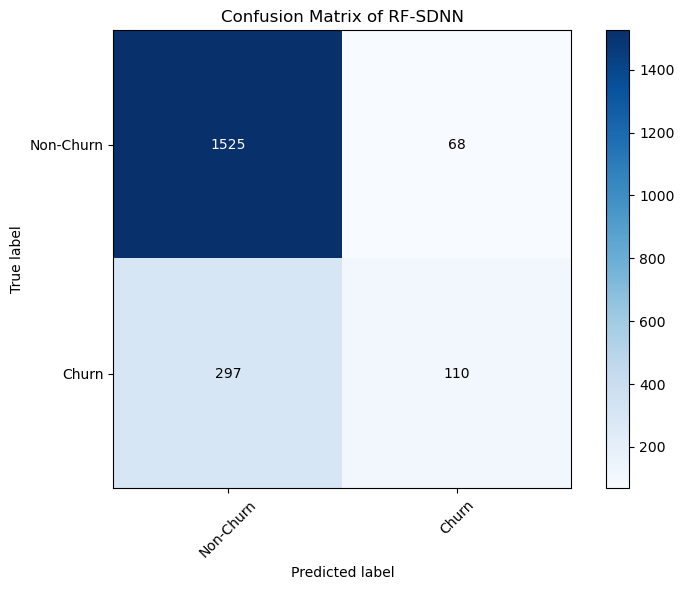

In [40]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf_ann, classes=class_names, normalize=False, title='Confusion Matrix of RF-SDNN', save_filename='cm_rf_sdnn.png')
plt.show()

#### SVMANN

In [41]:
y_pred_svmann = (y_pred_svm + y_pred_ann.flatten()) / 2
# set new values for the 'SVC-SDNN' column
y_pred_svmann_ = np.where(y_pred_svmann > 0.5, 1, 0)
np.save('y_pred_svmann_.npy', y_pred_svmann_)
results['SVC-SDNN'] = [accuracy_score(y_test, y_pred_svmann_),
                    precision_score(y_test, y_pred_svmann_, average='weighted'),
                    recall_score(y_test, y_pred_svmann_, average='weighted'),
                    f1_score(y_test, y_pred_svmann_, average='weighted'),
                    roc_auc_score(y_test, y_pred_svmann_, average='weighted')]

In [42]:
print(classification_report(y_test, y_pred_svmann_))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1593
           1       0.97      0.77      0.86       407

    accuracy                           0.95      2000
   macro avg       0.96      0.88      0.91      2000
weighted avg       0.95      0.95      0.95      2000



In [43]:
# Calculate the confusion matrix
cm_svmann = confusion_matrix(y_test, y_pred_svmann_)

Normalized confusion matrix
[[0.99435028 0.00564972]
 [0.23095823 0.76904177]]


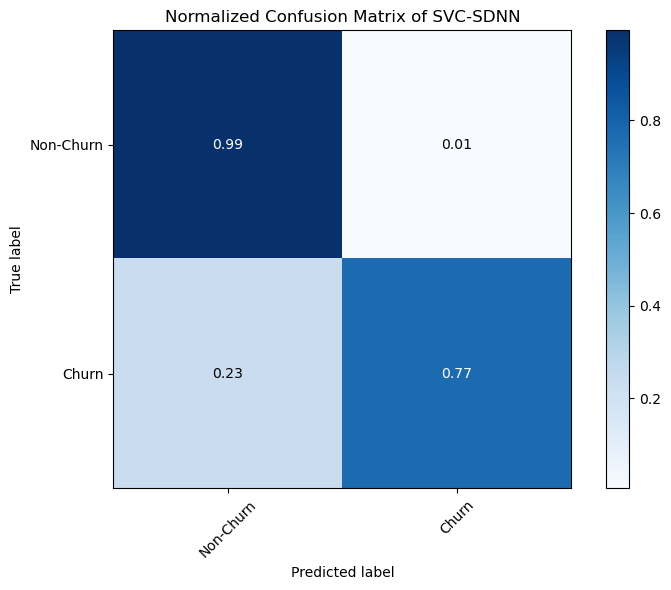

In [44]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svmann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SVC-SDNN', save_filename='norm_cm_svc_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1584    9]
 [  94  313]]


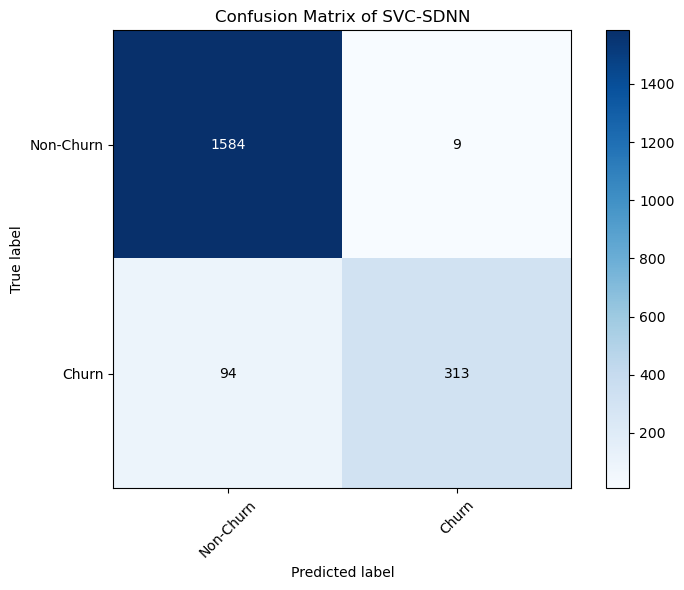

In [45]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svmann, classes=class_names, normalize=False, title='Confusion Matrix of SVC-SDNN', save_filename='cm_svc_sdnn.png')
plt.show()

In [46]:
results

,RF,SVM,ANN,RF-SDNN,SVC-SDNN
accuracy,0.786000,0.815500,0.820000,0.817500,0.948500
precision,0.763034,0.824591,0.829415,0.792423,0.949693
recall,0.786000,0.815500,0.820000,0.817500,0.948500
f1_score,0.771082,0.753400,0.762898,0.787899,0.946167
auc_roc,0.614140,0.553085,0.565057,0.613792,0.881696


In [47]:
# save the dataframe to a csv file
results.to_csv('results.csv')